# LinkedIn Posts

## Sin tokenizacion estandar

In [1]:
import pandas as pd
import spacy

In [2]:
df = pd.read_json('posts.json')

In [3]:
df

,descripcion,fecha
0,Here we have the lead trends for 2022!!!▪️Arti...,17/12/2021
1,It’s almost 2022 and we want to share the AI l...,15/12/2021
2,"""...Here we [...] demonstrate a method by whic...",10/12/2021
3,The limit of RPA is the imagination of the pro...,9/12/2021
4,Introducing an indoor garden controlled with a...,2/12/2021
...,...,...
266,Have you seen the future of the creative proce...,27/3/2023
267,It's fascinating how our understanding of brai...,29/3/2023
268,This is a summary of our last article: Artific...,30/3/2023
269,Nature has inspired a lot of innovations from ...,31/3/2023


In [4]:
df['descripcion'][56]

'▪️Data are the new gold!! If you have organized quality data, you started the first step to digital transformation. ▪️ #data + #AI = Best business decision-making to boost your enterprise.'

In [5]:
corpus=df["descripcion"]

In [6]:
# !python -m spacy download en_core_web_lg
nlp = spacy.load("en_core_web_lg")

In [7]:
def clean_hashtag_url(post):
    """
    remove all hastags and website links from a string
    """    

    return " ".join(word for word in post.split(' ') if ("#" not in word and "http" not in word))

In [8]:
corpus = corpus.apply(clean_hashtag_url)

In [9]:
import re 

def punct_space(token):
    """
    helper function to eliminate tokens
    that are pure punctuation or whitespace
    """

    return token.is_punct or token.is_space


def rm_pattern(post):
    """
    function returning a string without "...see more" and website links from the post. 
    This function uses "re.sub" to remove a specific pattern"""

    post = re.sub("…see more",'', post) # replace pattern by an empty string
    post = re.sub('http','',post)
    return post



def rules(token):
    """
    conditions to select a specific token for the corpus cleaning
    used with all() function : return True if all True.
    Conditions are : no pure puncuation - no pure whitespace - not a stopword 
    - not a #word
    """

    return [not punct_space(token),
            token not in nlp.Defaults.stop_words] 

In [10]:
def corpus_cleaning(posts):
    """
    generator function using spaCy to parse posts,
    remove "...see more" pattern, website links, lemmatize the text, lowercase words, and apply all the conditions we have set in rules.
    What this function returns is a generator (a "list") of individual tokens contained in lists. 
    """
    
    for post in nlp.pipe(posts.apply(rm_pattern)):
        yield ' '.join([token.lemma_.lower() for token in post if all(rules(token))])

In [11]:
preprocessed_posts = corpus_cleaning(corpus)
preprocessed_posts

<generator object corpus_cleaning at 0x000001C81624C200>

In [12]:
streamed_posts = (post.split(' ') for post in preprocessed_posts)
streamed_posts

<generator object <genexpr> at 0x000001C81624C2E0>

In [13]:
# for post in streamed_posts:
#     print(post)

In [14]:
all_posts = []

for streamed_post in streamed_posts:
    post = ' '.join(streamed_post)
    all_posts.append(post)

In [15]:
all_posts

['here we have the lead trend for 2022!!! ▪ ️artificial intelligence ▪ ️data and analytics ▪ ️rpawhich one will you implement in your business',
 'it ’ almost 2022 and we want to share the ai lead trend for the future year',
 'here we demonstrate a method by which can aid mathematician in discover new and that be simply amazing how thing be evolve in this field',
 'the limit of rpa be the imagination of the programmer 🤖 ▪ ️can you tell we a rpa out of the box application juan carlos castaño valencia diana cristhina pérez pérez fabian esteban peña castillo',
 'introduce an indoor garden control with an app and ai to enjoy fresh vegetable every day it will let you grow 64 plant simultaneously green ai mashable',
 'five way al contribute to wildlifeconservation 1 vast data collection 📊 2 study and protect specie 🐨 3 track wildlife pattern 📈 4 prediction of endanger specie 🐼 5 classify animal specie',
 'the participant of the plan semilla apprenticeship talk about their experience in the l

In [16]:
df['descripcion_clean'] = all_posts

In [17]:
df.head()

,descripcion,fecha,descripcion_clean
0,Here we have the lead trends for 2022!!!▪️Arti...,17/12/2021,here we have the lead trend for 2022!!! ▪ ️art...
1,It’s almost 2022 and we want to share the AI l...,15/12/2021,it ’ almost 2022 and we want to share the ai l...
2,"""...Here we [...] demonstrate a method by whic...",10/12/2021,here we demonstrate a method by which can aid ...
3,The limit of RPA is the imagination of the pro...,9/12/2021,the limit of rpa be the imagination of the pro...
4,Introducing an indoor garden controlled with a...,2/12/2021,introduce an indoor garden control with an app...


### Extracción de bigramas

In [18]:
from gensim.models import Phrases

preprocessed_posts = corpus_cleaning(corpus)
streamed_posts = (post.split(' ') for post in preprocessed_posts)
bigram_model = Phrases(streamed_posts,min_count=5,threshold=10)

In [19]:
bigram_posts = []

preprocessed_posts = corpus_cleaning(corpus)
streamed_posts = (post.split(' ') for post in preprocessed_posts)

for streamed_post in streamed_posts:
    bigram_post = ' '.join(bigram_model[streamed_post])
    bigram_posts.append(bigram_post)

In [20]:
bigram_posts

['here we have the lead trend for 2022!!! ▪ ️artificial intelligence ▪ ️data and analytics ▪ ️rpawhich one will you implement in your_business',
 'it ’ almost 2022 and we_want to share the ai lead trend for the future year',
 'here we demonstrate a method by which can aid mathematician in discover new and that be simply amazing how thing be evolve in this field',
 'the limit of rpa be the imagination of the programmer 🤖 ▪ ️can you tell we a rpa out of the box application juan carlos castaño valencia diana cristhina pérez pérez fabian esteban peña castillo',
 'introduce an indoor garden control with an app and ai to enjoy fresh vegetable every day it will let you grow 64 plant simultaneously green ai mashable',
 'five way al contribute to wildlifeconservation 1 vast data collection 📊 2 study and protect specie 🐨 3 track wildlife pattern 📈 4 prediction of endanger specie 🐼 5 classify animal specie',
 'the participant of the plan_semilla apprenticeship talk_about their experience in the l

### LDA

In [22]:
from gensim.corpora import Dictionary
posts = pd.Series(bigram_posts)

# Dictionary recquired to split the sentences into a list of words. Let's use split() function
streamed_posts = posts.apply(lambda str : str.split())

# Then we learn the dictionary by iterating over all of the reviews
# It return a generator
posts_dictionary = Dictionary(streamed_posts)

In [23]:
posts_dictionary

In [24]:
posts_dictionary.filter_extremes(no_below=10, no_above=0.5)
posts_dictionary.compactify()

In [25]:
bag_of_words = [posts_dictionary.doc2bow(post) for post in streamed_posts]

In [26]:
from gensim.models import LdaModel

num_topics = 5

# Train the model on the corpus.
lda = LdaModel(corpus=bag_of_words, id2word=posts_dictionary, num_topics=num_topics, passes=20,
                iterations=1000, random_state=100)

In [27]:
lda

In [28]:
def explore_topic(topic_number, topn=25):
    """
    accept a user-supplied topic number and
    print out a formatted list of the top terms
    """
        
    print ('{:20}{}'.format('term', 'frequency'))

    for term, frequency in lda.show_topic(topic_number,topn):
        print ("{:20}{:.03f}".format(term, round(frequency, 3)))

In [29]:
explore_topic(2, topn=25)

term                frequency
our                 0.072
ai                  0.042
how                 0.042
article             0.035
write_by            0.031
of                  0.030
by                  0.029
for                 0.029
here                0.027
it                  0.025
technology          0.025
we                  0.024
now                 0.023
quantum_computing   0.023
this                0.023
with                0.022
a                   0.020
quantum             0.019
new                 0.019
read_our            0.015
our_last            0.015
that                0.014
want_to             0.013
if_you              0.012
do                  0.012


In [30]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

LDAvis_prepared = gensimvis.prepare(lda, bag_of_words,
                                              posts_dictionary)
pyLDAvis.display(LDAvis_prepared)

c:\Users\ynino\AppData\Local\anaconda3\envs\PLANSEMILLA\Lib\site-packages\pyLDAvis\_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


+ Los clusters son similares entre sí
+ Hay palabras como our, you, of, for que podrían ser stopwords
+ Los emojis son tokens
+ Bigramas tienen buen significado_ quantum_computing, holistic_design, etc
+ Cuadrito


### K-Means

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Ignore terms that appear in more than 50% of the documents (max_df=0.5) and terms that are not present in at least 5 documents (min_df=5)
vectorizer = TfidfVectorizer(stop_words="english", max_df=0.5, min_df=1)


X_tfidf = vectorizer.fit_transform(bigram_posts)

print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

n_samples: 271, n_features: 2215


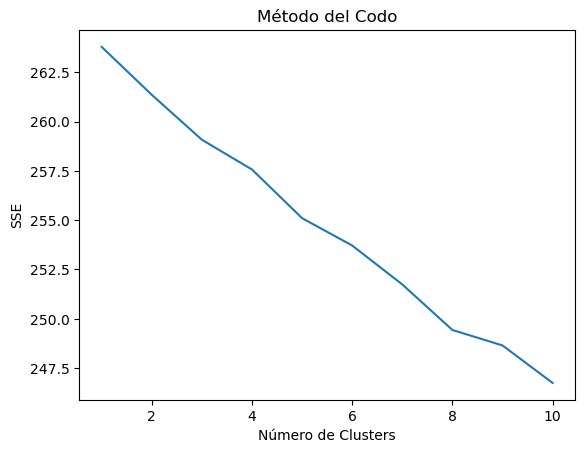

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


# Calcular el valor de SSE para diferentes valores de k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_tfidf)
    sse.append(kmeans.inertia_)

# Graficar la curva SSE vs. k
plt.plot(range(1, 11), sse)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.show()

In [34]:
# Aplicar el algoritmo K-Means a la matriz de características
kmeans = KMeans(n_clusters=7, random_state=0)
kmeans.fit(X_tfidf)

# Obtener los clusters asignados a cada documento
clusters = kmeans.labels_

# Obtener las palabras más comunes de cada cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(5):
    print("Cluster %d:" % i),
    for j in order_centroids[i, :30]:
        print(' %s' % terms[j]),
    print('\n')

Cluster 0:
 human
 ai
 want_to
 future
 machine
 do_you
 technology
 nuestro
 en
 model
 nlp
 talk_about
 el
 te
 artificial
 help
 let_
 discover
 inteligencia
 change
 stay
 tune
 set
 asesoftware
 job
 robot
 understand
 video
 andres
 nos


Cluster 1:
 equinox
 quantum
 day
 new
 celebrate
 role
 game
 ready
 happy
 year
 computer
 thomas
 plan
 emerge
 chocolate
 gpt
 important
 contraception
 semilla
 thank_you
 adopt
 relate
 joy
 solve
 month
 knowledge
 hope
 problem
 love
 warm


Cluster 2:
 improve
 ai
 do_you
 your_business
 use
 process
 digital_transformation
 computer_vision
 experience
 people
 start
 need
 company
 do_not
 like
 week
 step
 contact_we
 robot
 tech
 create
 jetson
 work
 time
 image
 implement
 information
 london_tech
 face
 recognition


Cluster 3:
 quantum_computing
 course
 quantum
 your_place
 thomas_clarke
 learn
 technical
 technology
 quantum_strategist
 save
 upload
 tomás_clarke
 website
 centre
 business
 august
 teach
 class
 watch
 thank_yo

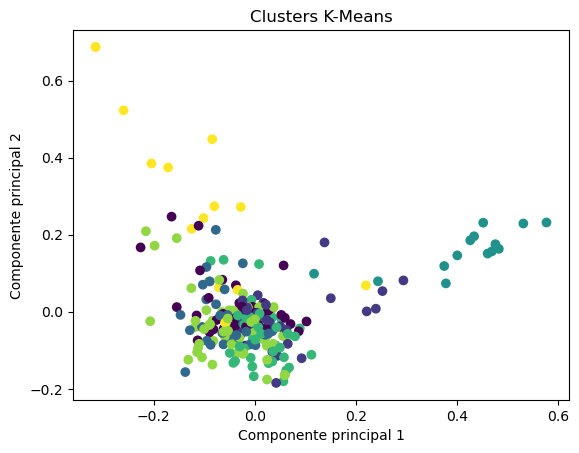

In [35]:
from sklearn.decomposition import PCA

# Reducir la dimensionalidad de la matriz de características TF-IDF a 2 dimensiones utilizando PCA
pca = PCA(n_components=2, random_state=0)
X_tfidf_2d = pca.fit_transform(X_tfidf.toarray())

# Graficar los puntos de datos coloreados por su asignación a cada cluster
plt.scatter(X_tfidf_2d[:, 0], X_tfidf_2d[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Clusters K-Means')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

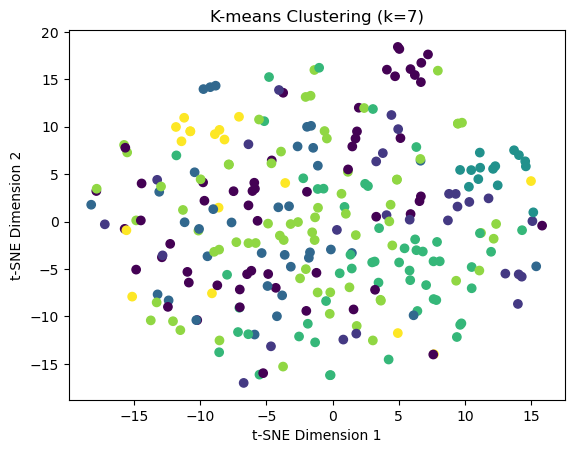

In [36]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reducción de dimensionalidad a 2D utilizando t-SNE
tsne = TSNE(n_components=2, perplexity=50, random_state=0)
X_tsne = tsne.fit_transform(X_tfidf.toarray())

# Graficar los clusters asignados a cada documento
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis')
plt.title('K-means Clustering (k=7)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


### K-Means with bigrams

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Ignore terms that appear in more than 50% of the documents (max_df=0.5) and terms that are not present in at least 5 documents (min_df=5)
vectorizer = TfidfVectorizer(stop_words="english", max_df=0.5, min_df=1)


X_tfidf = vectorizer.fit_transform(bigram_posts)

print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

n_samples: 271, n_features: 2215


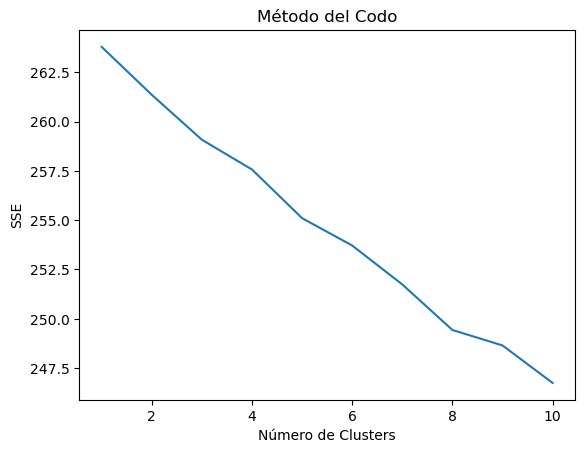

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


# Calcular el valor de SSE para diferentes valores de k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_tfidf)
    sse.append(kmeans.inertia_)

# Graficar la curva SSE vs. k
plt.plot(range(1, 11), sse)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.show()

In [40]:
# Aplicar el algoritmo K-Means a la matriz de características
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(X_tfidf)

# Obtener los clusters asignados a cada documento
clusters = kmeans.labels_

# Obtener las palabras más comunes de cada cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(5):
    print("Cluster %d:" % i),
    for j in order_centroids[i, :30]:
        print(' %s' % terms[j]),
    print('\n')

Cluster 0:
 quantum_computing
 quantum
 course
 tomás_clarke
 technology
 thomas_clarke
 quantum_strategist
 learn
 your_place
 technical
 save
 upload
 website
 centre
 thank_you
 business
 new
 problem
 knowledge
 august
 teach
 class
 watch
 come
 start
 emerge
 qc
 solve
 thomas
 iván_caballero


Cluster 1:
 ai
 equinox
 use
 solution
 create
 design
 do_you
 the_good
 human
 model
 think
 way
 look
 understand
 you_think
 designer
 team
 need
 people
 what_do
 al
 experience
 know
 thank_you
 world
 make
 apply
 happy
 technology
 trust


Cluster 2:
 ai
 discover
 lab
 improve
 design
 holistic_design
 automate
 asesoftware
 equinox
 your_business
 talk_about
 task
 event
 talk
 process
 week
 experience
 amazing
 productive
 section
 model
 thank_you
 different
 new
 let_
 podcast
 app
 want_to
 comment
 gpt


Cluster 3:
 datum
 data
 work
 love
 today
 ai
 career
 rpa
 start
 learn
 thank_you
 company
 day
 team
 like
 year
 data_science
 information
 make
 equinox
 enjoy
 read


## Con tokenización estandar

In [41]:
import pandas as pd
import spacy
import string
from langdetect import detect
import re 
import nltk
from nltk.corpus import stopwords
from gensim.models import Phrases
from gensim.corpora import Dictionary
from gensim.models import LdaModel

nlp = spacy.load("en_core_web_lg")

contractions_dict = { "ain\'t": "are not", "\'s":" is", "aren\'t": "are not", "can\'t": "cannot", 
                     "can\'t\'ve": "cannot have", "\'cause": "because", "could\'ve": "could have", 
                     "couldn\'t": "could not", "couldn\'t've": "could not have", "didn\'t": "did not", 
                     "doesn\'t": "does not", "don\'t": "do not", "hadn\'t": "had not", 
                     "hadn\'t\'ve": "had not have", "hasn\'t": "has not", "haven\'t": "have not",
                     "he\'d": "he would", "he\'d\'ve": "he would have", "he\'ll": "he will", 
                     "he\'ll\'ve": "he will have", "how\'d": "how did", "how\'d\'y": "how do you", 
                     "how\'ll": "how will", "i\'d": "i would", "i\'d\'ve": "i would have", "i\'ll": "i will",
                     "i\'ll\'ve": "i will have", "i\'m": "i am", "i\'ve": "i have", "isn\'t": "is not",
                     "it\'d": "it would", "it\'d\'ve": "it would have", "it\'ll": "it will", 
                     "it\'ll\'ve": "it will have", "let\'s": "let us", "ma\'am": "madam", "mayn\'t": "may not",
                     "might\'ve": "might have", "mightn\'t": "might not", "mightn\'t\'ve": "might not have",
                     "must\'ve": "must have", "mustn\'t": "must not", "mustn\'t\'ve": "must not have",
                     "needn\'t": "need not", "needn\'t\'ve": "need not have", "o\'clock": "of the clock",
                     "oughtn\'t": "ought not", "oughtn\'t\'ve": "ought not have", "shan\'t": "shall not",
                     "sha\'n\'t": "shall not", "shan\'t\'ve": "shall not have", "she\'d": "she would",
                     "she\'d\'ve": "she would have", "she\'ll": "she will", "she\'ll\'ve": "she will have", 
                     "should\'ve": "should have", "shouldn\'t": "should not", "shouldn\'t\'ve": "should not have",
                     "so\'ve": "so have", "that\'d": "that would", "that\'d\'ve": "that would have",
                     "there\'d": "there would", "there\'d\'ve": "there would have", "they\'d": "they would",
                     "they\'d\'ve": "they would have","they\'ll": "they will", "they\'ll\'ve": "they will have",
                     "they\'re": "they are", "they\'ve": "they have", "to\'ve": "to have", "wasn\'t": "was not",
                     "we\'d": "we would", "we\'d\'ve": "we would have", "we\'ll": "we will", "we\'ll\'ve": "we will have",
                     "we\'re": "we are", "we\'ve": "we have", "weren\'t": "were not","what\'ll": "what will",
                     "what\'ll've": "what will have", "what\'re": "what are", "what\'ve": "what have",
                     "when\'ve": "when have", "where\'d": "where did", "where\'ve": "where have", 
                     "who\'ll": "who will", "who\'ll\'ve": "who will have", "who\'ve": "who have",
                     "why\'ve": "why have", "will\'ve": "will have", "won\'t": "will not",
                     "won\'t\'ve": "will not have", "would\'ve": "would have", "wouldn\'t": "would not",
                     "wouldn\'t\'ve": "would not have", "y\'all": "you all", "y\'all\'d": "you all would",
                     "y\'all\'d'\'ve": "you all would have", "y\'all\'re": "you all are",
                     "y\'all\'ve": "you all have", "you\'d": "you would", "you\'d\'ve": "you would have",
                     "you\'ll": "you will", "you\'ll\'ve": "you will have", "you\'re": "you are",
                     "you\'ve": "you have"}


def expand_contractions(s, contractions_dict=contractions_dict):
  contractions_re = re.compile('(%s)'%'|'.join(contractions_dict.keys()))
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, s)


def clean_hashtag_url(post):
    """
    remove all hastags and website links from a string
    """    

    return " ".join(word for word in post.split(' ') if ("#" not in word and "http" not in word))

def punct_space(token):
    """
    helper function to eliminate tokens
    that are pure punctuation or whitespace
    """

    return token.is_punct or token.is_space

def rm_pattern(post):
    """
    function returning a string without "...see more" and website links from the post. 
    This function uses "re.sub" to remove a specific pattern"""

    post = re.sub("…see more",'', post) # replace pattern by an empty string
    post = re.sub('http','',post)
    return post

def preprocess(post):
    
    clean_text = post.translate(str.maketrans("", "", string.punctuation))
    clean_text = clean_text.replace("\n", " ")
    clean_text = clean_text.replace("\u200d", "")
    clean_text = clean_text.replace("\u200b", "")
    clean_text = clean_text.replace("▪", "")
    clean_text = clean_text.replace("\'", "")
    clean_text = clean_text.replace("”", "")
    clean_text = clean_text.lower()
    stop_words = set(stopwords.words('english'))# - {'we', 'i', 'you', 'our', 'himself', 'herself', 'him', 'hers', 'his', 'her', 'ourselves', 'themselves', 'ours'}
    clean_text = " ".join([word for word in clean_text.split() if word not in stop_words])
    clean_text = " ".join(clean_text.split())
    
    return clean_text

def rules(token):
    """
    conditions to select a specific token for the corpus cleaning
    used with all() function : return True if all True.
    Conditions are : no pure puncuation - no pure whitespace - not a stopword 
    - not a #word
    """

    return [not punct_space(token),
            token.pos_ == 'NOUN' or token.pos_ =="ADJ"] 

def corpus_cleaning(posts):
    """
    generator function using spaCy to parse posts,
    remove "...see more" pattern, website links, lemmatize the text, lowercase words, and apply all the conditions we have set in rules.
    What this function returns is a generator (a "list") of individual tokens contained in lists. 
    """
    
    for post in nlp.pipe(posts.apply(rm_pattern)):
        yield ' '.join([token.lemma_ for token in post if all(rules(token))])

def main_token(json_name,column_name_corpus):

    nltk.download('stopwords')
    df = pd.read_json(json_name)

    df['language'] = df[column_name_corpus].apply(detect)
    df=df[df['language']!= 'es'].drop('language', axis=1)

    corpus=df[column_name_corpus]

    corpus = corpus.apply(expand_contractions)

    corpus = corpus.apply(clean_hashtag_url)
    corpus = corpus.apply(preprocess)

    preprocessed_posts = corpus_cleaning(corpus)
    streamed_posts = (post.split(' ') for post in preprocessed_posts)
    all_posts = []
    for streamed_post in streamed_posts:
        post = ' '.join(streamed_post)
        all_posts.append(post)

    # Process after cleaning

    df['descripcion_clean'] = all_posts

    preprocessed_posts = corpus_cleaning(corpus)
    streamed_posts = (post.split(' ') for post in preprocessed_posts)
    bigram_model = Phrases(streamed_posts,min_count=5,threshold=10)

    bigram_posts = []

    preprocessed_posts = corpus_cleaning(corpus)
    streamed_posts = (post.split(' ') for post in preprocessed_posts)

    for streamed_post in streamed_posts:
        bigram_post = ' '.join(bigram_model[streamed_post])
        bigram_posts.append(bigram_post)

    clean_corpus=bigram_posts

    return clean_corpus
    

if __name__ == "__main__":
    clean_corpus=main_token("equinox_linkedin.json","descripcion")
    print(clean_corpus)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ynino\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['trend intelligence ️rpawhich implement business', 'want share trend future year', 'method aid mathematician new amazing thing field', 'imagination programmer', 'indoor garden app fresh vegetable day plant green mashable', 'way wildlifeconservation vast datum collection study protect specie 🐨 track wildlife pattern prediction specie 🐼 animal specie', 'participant semilla apprenticeship talk experience last month today thank effort welcome team 🏻 👏 🏻 👏', 'today new member team semilla plan apprenticeship help professional first job undergraduate program honor opportunity last month mentor possible tooalejandro salamanca', 'answer question thought world', 'second day 📲 key ️multidisciplinary team boost designer datum_scientist engineer design key product good design invisible notorious bad design', 'shocking truth datum_science career datum sciencist build model', 'good solution context need accurate use ml', 'webinar balance human talksoscar raúl garavito lab image tourism website', 'n

### LDA

In [42]:
from gensim.corpora import Dictionary
posts = pd.Series(clean_corpus)

# Dictionary recquired to split the sentences into a list of words. Let's use split() function
streamed_posts = posts.apply(lambda str : str.split())

# Then we learn the dictionary by iterating over all of the reviews
# It return a generator
posts_dictionary = Dictionary(streamed_posts)

In [43]:
posts_dictionary.filter_extremes(no_below=10, no_above=0.5)
posts_dictionary.compactify()

bag_of_words = [posts_dictionary.doc2bow(post) for post in streamed_posts]

from gensim.models import LdaModel

num_topics = 5

# Train the model on the corpus.
lda = LdaModel(corpus=bag_of_words, id2word=posts_dictionary, num_topics=num_topics, passes=20,
                iterations=1000, random_state=100)

def explore_topic(topic_number, topn=25):
    """
    accept a user-supplied topic number and
    print out a formatted list of the top terms
    """
        
    print ('{:20}{}'.format('term', 'frequency'))

    for term, frequency in lda.show_topic(topic_number,topn):
        print ("{:20}{:.03f}".format(term, round(frequency, 3)))

explore_topic(2, topn=25)

term                frequency
human               0.142
robot               0.104
technology          0.081
quantum             0.074
process             0.041
machine             0.040
job                 0.037
article             0.034
artificial_intelligence0.031
new                 0.030
company             0.027
future              0.026
information         0.023
automation          0.023
design              0.022
people              0.022
time                0.019
business            0.018
talk                0.015
way                 0.014
work                0.013
place               0.012
equinox             0.011
video               0.011
contact             0.011


In [44]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

LDAvis_prepared = gensimvis.prepare(lda, bag_of_words,
                                              posts_dictionary)
pyLDAvis.display(LDAvis_prepared)

### K-Means

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Ignore terms that appear in more than 50% of the documents (max_df=0.5) and terms that are not present in at least 5 documents (min_df=5)
vectorizer = TfidfVectorizer(stop_words="english", max_df=0.5, min_df=1)


X_tfidf = vectorizer.fit_transform(clean_corpus)

print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")


n_samples: 266, n_features: 1304


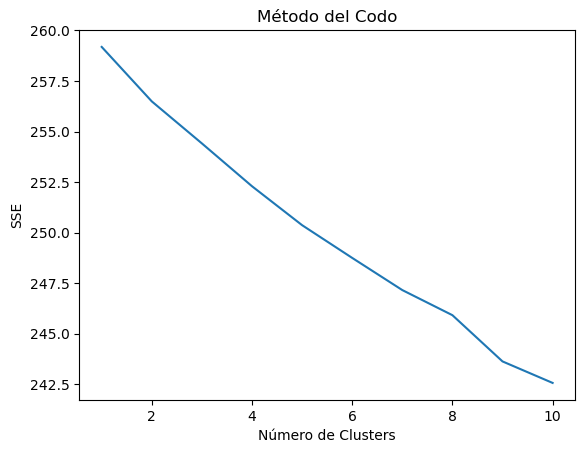

In [46]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')


# Calcular el valor de SSE para diferentes valores de k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_tfidf)
    sse.append(kmeans.inertia_)

# Graficar la curva SSE vs. k
plt.plot(range(1, 11), sse)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('SSE')
plt.show()

In [67]:
# Aplicar el algoritmo K-Means a la matriz de características
kmeans = KMeans(n_clusters=8, random_state=0)
kmeans.fit(X_tfidf)

# Obtener los clusters asignados a cada documento
clusters = kmeans.labels_

# Obtener las palabras más comunes de cada cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(5):
    print("Cluster %d:" % i),
    for j in order_centroids[i, :30]:
        print(' %s' % terms[j]),
    print('\n')

Cluster 0:
 datum
 user
 team
 good
 business
 engineer
 contact
 year
 ai
 work
 week
 model
 designer
 thank
 experience
 happy
 different
 product
 support
 background
 today
 love
 project
 holiday
 data
 time
 automation
 semilla
 talk
 equinox


Cluster 1:
 equinox
 ready
 game
 woman
 company
 job
 robot
 love
 set
 day
 value
 money
 happy
 time
 overdose
 technology
 big
 league
 repetitive
 automation
 machine
 mind
 master
 interesting
 event
 team
 great
 academic
 mindset
 add


Cluster 2:
 information
 model
 future
 use
 machine
 think
 role
 talk
 process
 image
 business
 learning
 human
 way
 year
 datum_science
 creative
 language
 skin
 robot
 mind
 tool
 share
 datum
 f1
 potentiate
 today
 artificial_intelligence
 functionality
 knowledge


Cluster 3:
 human
 datum_scientist
 brain
 robot
 machine
 day
 artificial
 important
 video
 application
 neural
 article
 app
 career
 apply
 image
 ethic
 network
 work
 website
 decision
 beer
 start
 chocolate
 inventory
 

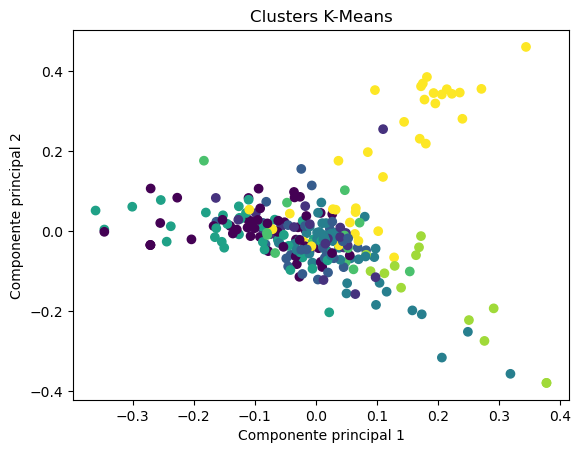

In [68]:
from sklearn.decomposition import PCA

# Reducir la dimensionalidad de la matriz de características TF-IDF a 2 dimensiones utilizando PCA
pca = PCA(n_components=2, random_state=0)
X_tfidf_2d = pca.fit_transform(X_tfidf.toarray())

# Graficar los puntos de datos coloreados por su asignación a cada cluster
plt.scatter(X_tfidf_2d[:, 0], X_tfidf_2d[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Clusters K-Means')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()


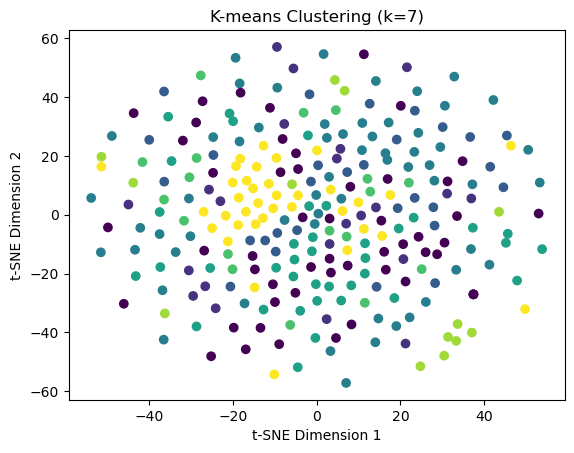

In [69]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Reducción de dimensionalidad a 2D utilizando t-SNE
tsne = TSNE(n_components=2, perplexity=50, random_state=0)
X_tsne = tsne.fit_transform(X_tfidf.toarray())

# Graficar los clusters asignados a cada documento
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis')
plt.title('K-means Clustering (k=7)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

### DBSCAN

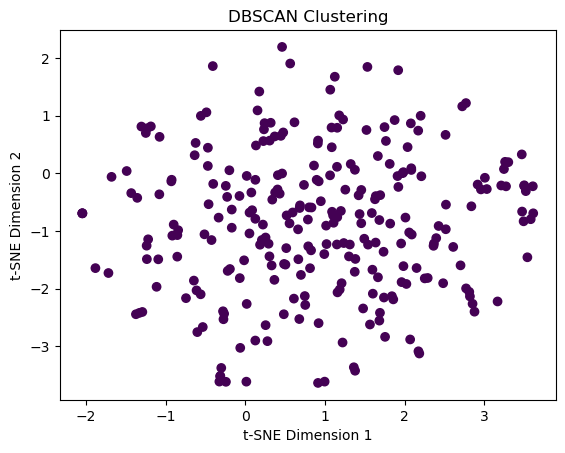

In [70]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_tfidf)
clusters = dbscan.labels_

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, random_state=0)
X_tsne = tsne.fit_transform(X_tfidf.toarray())

import matplotlib.pyplot as plt
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()
